# Identifying Key Content and Media Features Driving Online News Popularity 
# A Comparison of Linear and Non-Linear Models


## Objective

The goal of this project is to compare linear and non-linear model to identify which content and media features are most strongly associated with online news popularity.




## 1. Data Description
The dataset used in this study is the Online News Popularity dataset, which contains information about online news articles and their associated popularity.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [81]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [82]:
nrow = df.shape[0]
ncol = df.shape[1]

print(nrow,ncol)

39644 61


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [84]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

The dataset consists of 39,644 observations and 61 variables. Each observation corresponds to a single news article. Moreover, the dataset includes a mixture of continuous variables and indicator variables capturing temporal, content-related, and metadata attributes of news articles.

## 2. Y - Exploratory Data Analysis

In [85]:
y = df[" shares"] 
print(y)

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64


In [86]:
print(y.describe())

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64


In [87]:
print("y.min:", y.min(), "y.max:" , y.max())

y.min: 1 y.max: 843300


### Log-Transformed Target Variable


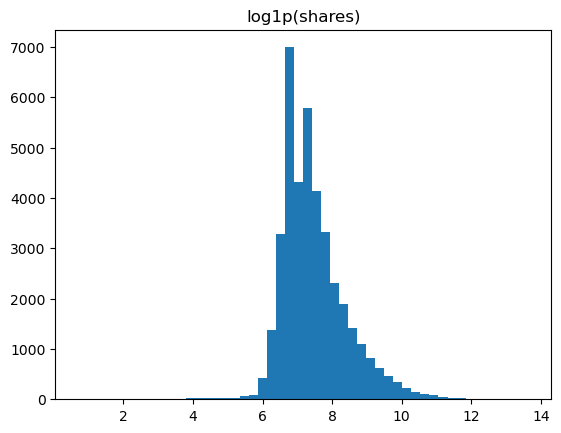

In [88]:
plt.hist(np.log1p(y), bins=50)
plt.title("log1p(shares)")
plt.show()

### Heavy-Tailedness of the Target Variable

To assess whether the target variable exhibits heavy-tailed behavior, we compare the maximum value to the median as a simple diagnostic.
A large max-to-median ratio indicates the presence of extreme values and suggests that the distribution may be heavy-tailed.


In [89]:
print('Max to Med ratio: ' , y.max()/y.median())

Max to Med ratio:  602.3571428571429


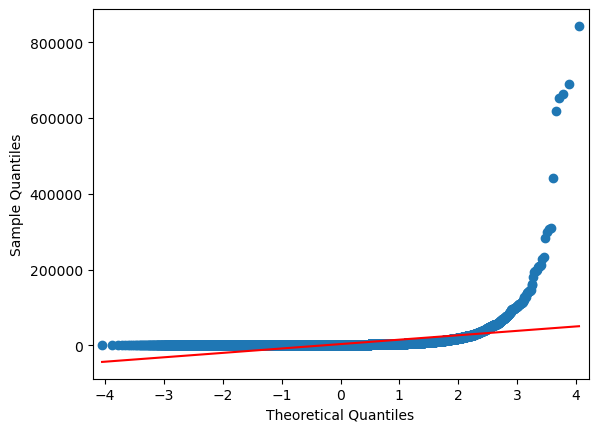

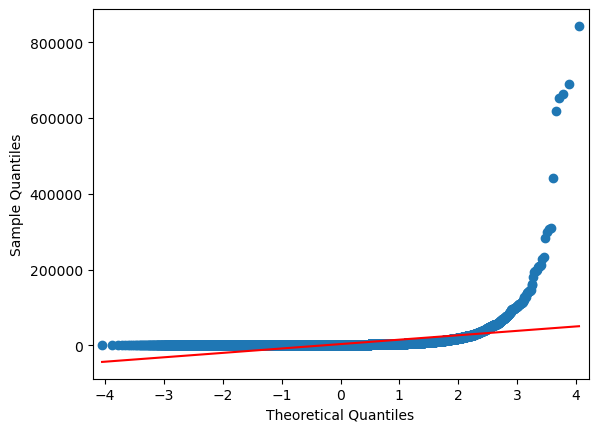

In [90]:
sm.qqplot(y, line='s') 

### Extreme values for Target Variable

In [91]:
qlow = y.quantile(0.01)
qhigh = y.quantile(0.99)

df[' extreme values'] = ((y <= qlow) | (y >= qhigh))
print(df[' extreme values'].head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name:  extreme values, dtype: bool


Based on the max-to-median ratio, the target variable exhibits heavy-tailed behavior. The distribution is strongly right-skewed, with a small number of extreme values dominating the upper tail. This pattern is further supported by the Q–Q plot, which shows substantial deviation from the reference line in the upper quantiles, indicating the presence of numerous extreme observations.

Given the pronounced heavy-tailed nature of the target variable, we adopt Mean Absolute Error (MAE) as the evaluation metric, as it is more robust to extreme values than squared-error-based measures.

## 3. X - Exploratory Data Analysis

In [92]:
X = df.drop(columns=[' shares', 'url'])

In [93]:
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,extreme values
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,False
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,False
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,False
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,False
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,False


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [95]:
X.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [96]:
X.nunique().sort_values()

extreme values                       2
weekday_is_tuesday                   2
weekday_is_wednesday                 2
weekday_is_thursday                  2
weekday_is_friday                    2
weekday_is_saturday                  2
weekday_is_sunday                    2
is_weekend                           2
data_channel_is_world                2
data_channel_is_tech                 2
data_channel_is_socmed               2
weekday_is_monday                    2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_lifestyle            2
num_keywords                        10
n_tokens_title                      20
kw_min_min                          26
min_positive_polarity               33
kw_max_max                          35
max_positive_polarity               38
max_negative_polarity               49
num_videos                          53
min_negative_polarity               54
num_self_hrefs                      59
num_imgs                 

### Heavy-Tailedness of the Target Variables X

In [97]:
X_num = X.select_dtypes(include=['number'])

for col in X_num.columns:
    med = X[col].median()
    if med > 0:
        print(col, X[col].max() / med)

 timedelta 2.1563421828908553
 n_tokens_title 2.3
 n_tokens_content 20.718826405867972
 n_unique_tokens 1300.0125872690435
 n_non_stop_words 1042.000004201344
 n_non_stop_unique_tokens 941.3793133465615
 num_hrefs 38.0
 num_self_hrefs 38.666666666666664
 num_imgs 128.0
 average_token_length 1.7241406215392148
 num_keywords 1.4285714285714286
 kw_max_min 452.1212121212121
 kw_avg_min 181.85926599957537
 kw_min_max 602.3571428571429
 kw_max_max 1.0
 kw_avg_max 3.4480612407111644
 kw_min_avg 3.529615208286711
 kw_max_avg 68.5081077215125
 kw_avg_avg 15.179973274067383
 self_reference_min_shares 702.75
 self_reference_max_shares 301.17857142857144
 self_reference_avg_sharess 383.3181818181818
 LDA_00 27.764830810313555
 LDA_01 27.768666085496243
 LDA_02 22.997714057633765
 LDA_03 23.16293015928629
 LDA_04 22.765801013315073
 global_subjectivity 2.2052790762984444
 global_sentiment_polarity 6.1103144196417105
 global_rate_positive_words 3.9845397048459485
 global_rate_negative_words 12.0575

Text(0.5, 1.0, 'Log-Transformed Distribution of n_unique_tokens')

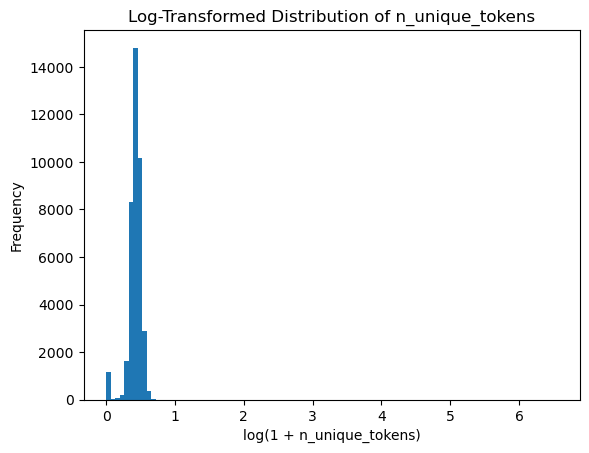

In [98]:
plt.hist(np.log1p(X[' n_unique_tokens']), bins=100)
plt.xlabel('log(1 + n_unique_tokens)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of n_unique_tokens')

Text(0.5, 1.0, 'Relationship Between num_imgs and Article Popularity')

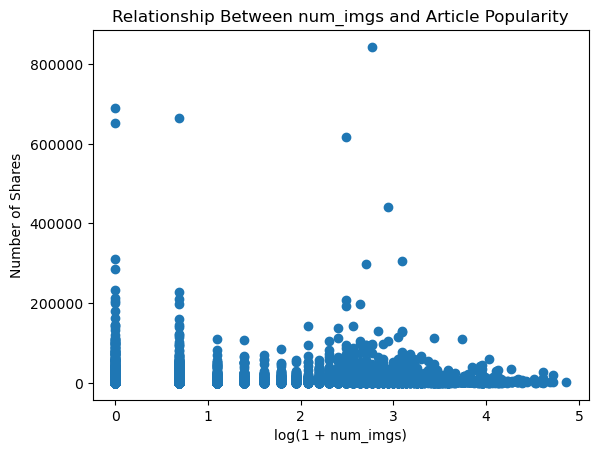

In [99]:
plt.scatter(np.log1p(X[' num_imgs']),y)
plt.xlabel('log(1 + num_imgs)')
plt.ylabel('Number of Shares')
plt.title('Relationship Between num_imgs and Article Popularity')

Text(0.5, 1.0, 'Relationship Between n_unique_tokens and Article Popularity')

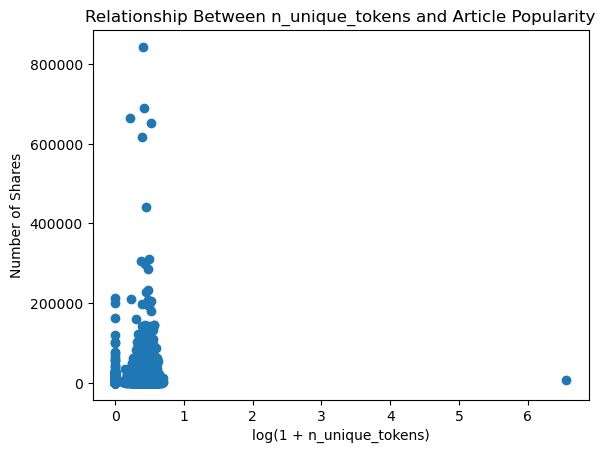

In [100]:
plt.scatter(np.log1p(X[' n_unique_tokens']),y)
plt.xlabel('log(1 + n_unique_tokens)')
plt.ylabel('Number of Shares')
plt.title('Relationship Between n_unique_tokens and Article Popularity')

Text(0.5, 1.0, 'Relationship Between n_non_stop_words and Article Popularity')

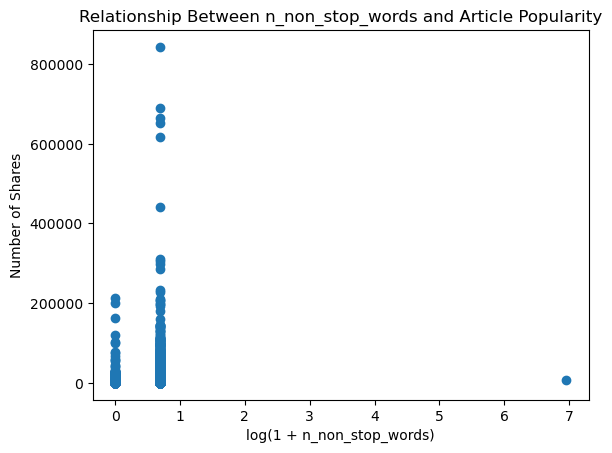

In [101]:
plt.scatter(np.log1p(X[' n_non_stop_words']),y)
plt.xlabel('log(1 + n_non_stop_words)')
plt.ylabel('Number of Shares')
plt.title('Relationship Between n_non_stop_words and Article Popularity')

Text(0.5, 1.0, 'Relationship Between n_non_stop_unique_tokens and Article Popularity')

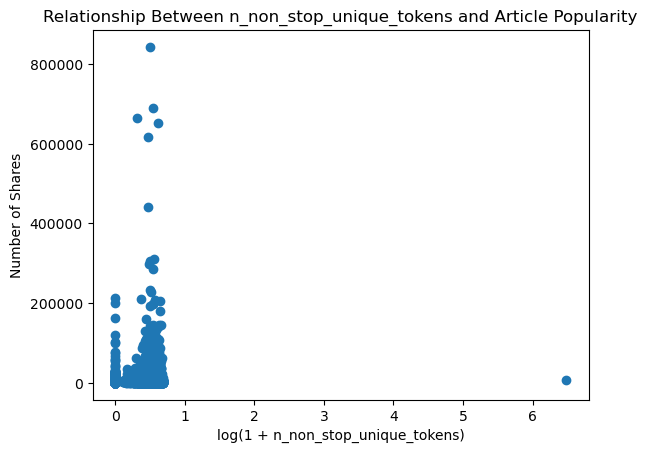

In [102]:
plt.scatter(np.log1p(X[' n_non_stop_unique_tokens']),y)
plt.xlabel('log(1 + n_non_stop_unique_tokens)')
plt.ylabel('Number of Shares')
plt.title('Relationship Between n_non_stop_unique_tokens and Article Popularity')

In [103]:
df.groupby(' is_weekend')[' shares'].mean()

 is_weekend
0.0    3318.855140
1.0    3903.394412
Name:  shares, dtype: float64

Several explanatory variables exhibit extremely large values that may dominate the upper tail of their distributions. To better understand the scale and prevalence of such extreme observations, we visually inspect a subset of variables with particularly long upper tails.
The inspection shows that applying a log(1 + x) transformation reduces marginal skewness but does not fully mitigate heavy-tailed behavior or
the presence of extreme values. In addition, for indicator variables such as `is_weekend`, we observe that articles published on weekends tend to receive higher numbers of shares.


## 3. Train–Test Split

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

## 4. Baseline Model

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = y.median()
y_hat = np.repeat(y_pred, len(y_test))

print(f"Mean absolute error {mean_absolute_error(y_test, y_hat):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_hat):.2f}")

Mean absolute error 2511.04
Coefficient of determination: -0.03


## 5. Ordinary Least Squares (OLS)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

regressor = LinearRegression().fit(X_train, y_train)

In [107]:
y_pred1 = regressor.predict(X_test)

print(f"Mean absolute error {mean_absolute_error(y_test, y_pred1):.2f}")

print(f"Coefficient of determination: {r2_score(y_test, y_pred1):.2f}")

Mean absolute error 2825.47
Coefficient of determination: 0.17


Compared to the baseline model, the Ordinary Least Squares (OLS) model achieves a higher MAE, suggesting limited predictive effectiveness.
This observation motivates the exploration of potential remedies.

In [108]:
y_train_log = np.log1p(y_train)

regressor = LinearRegression().fit(X_train, y_train_log)
y_pred2 = regressor.predict(X_test)

y_pred3 = np.expm1(y_pred2)

print(f"Mean absolute error {mean_absolute_error(y_test, y_pred3):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred3):.2f}")

Mean absolute error 2447.81
Coefficient of determination: 0.01


We first apply a log(1 + y) transformation to the target variable in the OLS framework. While this transformation leads to a modest reduction in MAE compared to the original OLS model, it does not sufficiently address the underlying non-linear relationships and extreme-value behavior in the data.

### Residual Plot

Text(0.5, 1.0, 'Residual Plot for the Baseline Model (Test Set)')

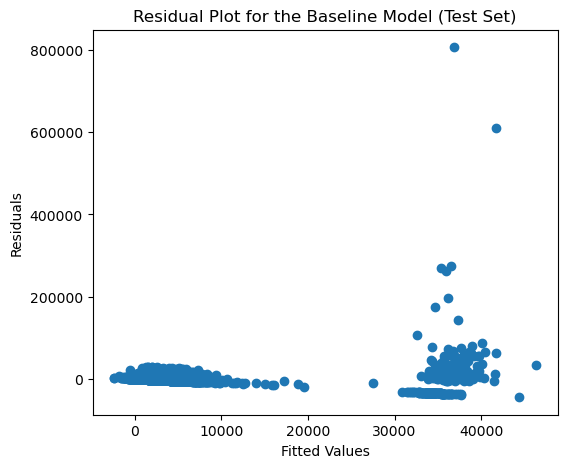

In [109]:
residuals = y_test - y_pred1

plt.figure(figsize=(6,5))
plt.scatter(y_pred1, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for the Baseline Model (Test Set)')

Text(0.5, 1.0, 'Residual Plot for the Original OLS Model (Test Set)')

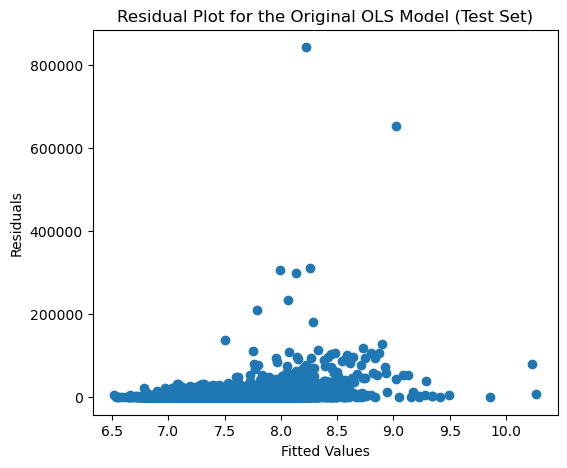

In [110]:
residuals = y_test - y_pred2

plt.figure(figsize=(6,5))
plt.scatter(y_pred2, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for the Original OLS Model (Test Set)')

Text(0.5, 1.0, 'Residual Plot for the OLS Model with log(1 + y) Transformation (Test Set)')

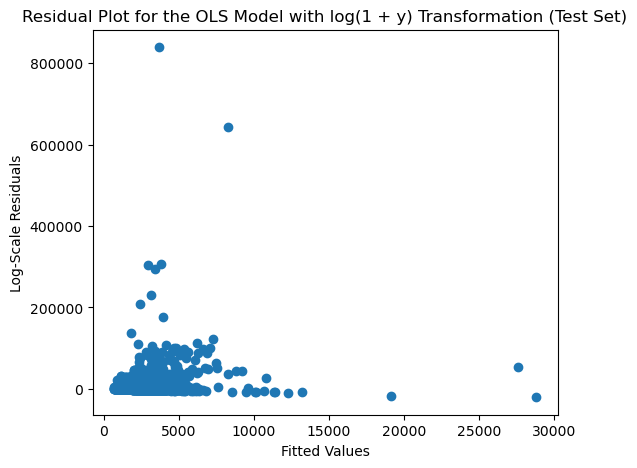

In [111]:
residuals = y_test - y_pred3

plt.figure(figsize=(6,5))
plt.scatter(y_pred3, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Log-Scale Residuals') 
plt.title('Residual Plot for the OLS Model with log(1 + y) Transformation (Test Set)')

To complement the visual inspection of residual plots, we compute the correlation between the absolute residuals and fitted values as a simple diagnostic for heteroskedasticity. A strong positive correlation suggests that residual variance increases with the magnitude of fitted values.

In [112]:
resid_ols = y_test - y_pred2
corr_ols = np.corrcoef(np.abs(resid_ols), y_pred2)[0,1]

resid_log = y_test - y_pred3
corr_log = np.corrcoef(np.abs(resid_log), y_pred3)[0,1]

print("corr(|resid|, fitted) OLS:", corr_ols)
print("corr(|resid|, fitted) log-OLS:", corr_log)

corr(|resid|, fitted) OLS: 0.2102246813733072
corr(|resid|, fitted) log-OLS: 0.22978302221950767


Comparing the residual plots across the baseline, original OLS, and log-transformed OLS models, clear patterns and clustering of residuals are observed. Even after applying a log(1 + y) transformation, the residuals do not appear to be randomly scattered around zero, indicating
persistent model misspecification.

These patterns suggest that the linear model struggles to capture the underlying relationship between the predictors and the target variable,
particularly in the presence of noisy features and extreme values. This highlights the limitations of OLS when applied to heavy-tailed and highly heterogeneous data.

## 6. Random Forest

Given the limitations observed in the linear models, we next consider a non-linear approach using Random Forest to examine whether it provides improved predictive performance.

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators = 600,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
            
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(f"Mean absolute error {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred_rf):.2f}")

Mean absolute error 2647.22
Coefficient of determination: 0.24


### Selection of the Number of Trees

In [114]:
from sklearn.ensemble import RandomForestRegressor

for estimator in [100,300,600,800,1000]:
    rf = RandomForestRegressor(
        n_estimators = estimator,
        max_depth=None,
        min_samples_leaf=10,
        random_state=42,
        n_jobs=-1
    )
            
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)

    print(f"Mean absolute error {mean_absolute_error(y_test, y_pred_rf):.2f}")
    print(f"Coefficient of determination: {r2_score(y_test, y_pred_rf):.2f}")

Mean absolute error 2553.20
Coefficient of determination: 0.28
Mean absolute error 2552.11
Coefficient of determination: 0.28
Mean absolute error 2551.97
Coefficient of determination: 0.28
Mean absolute error 2551.73
Coefficient of determination: 0.28
Mean absolute error 2553.95
Coefficient of determination: 0.27


### Selection of Minimum Samples per Leaf

In [115]:
from sklearn.ensemble import RandomForestRegressor

for leaf in [1,2,5,10] :
    rf = RandomForestRegressor(
        n_estimators = 600,
        max_depth=None,
        min_samples_leaf=leaf,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)

    print(f"Mean absolute error {mean_absolute_error(y_test, y_pred_rf):.2f}")
    print(f"Coefficient of determination: {r2_score(y_test, y_pred_rf):.2f}")

Mean absolute error 2709.13
Coefficient of determination: 0.23
Mean absolute error 2647.22
Coefficient of determination: 0.24
Mean absolute error 2580.25
Coefficient of determination: 0.27
Mean absolute error 2551.97
Coefficient of determination: 0.28


In [116]:
from sklearn.ensemble import RandomForestRegressor

for leaf in [20,30,40,60,80,100] :
    rf = RandomForestRegressor(
        n_estimators = 600,
        max_depth=None,
        min_samples_leaf=leaf,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)

    print(f"Mean absolute error {mean_absolute_error(y_test, y_pred_rf):.2f}")
    print(f"Coefficient of determination: {r2_score(y_test, y_pred_rf):.2f}")

Mean absolute error 2547.34
Coefficient of determination: 0.29
Mean absolute error 2545.78
Coefficient of determination: 0.30
Mean absolute error 2549.60
Coefficient of determination: 0.29
Mean absolute error 2555.91
Coefficient of determination: 0.28
Mean absolute error 2571.00
Coefficient of determination: 0.28
Mean absolute error 2587.56
Coefficient of determination: 0.26


### Selection of Maximum Features

In [117]:
from sklearn.ensemble import RandomForestRegressor

for features in [0.8,0.9,1.0] :
    rf = RandomForestRegressor(
        n_estimators = 600,
        max_depth=None,
        max_features=features,
        min_samples_leaf=30,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)

    print(f"Mean absolute error {mean_absolute_error(y_test, y_pred_rf):.2f}")
    print(f"Coefficient of determination: {r2_score(y_test, y_pred_rf):.2f}")

Mean absolute error 2541.07
Coefficient of determination: 0.29
Mean absolute error 2543.71
Coefficient of determination: 0.29
Mean absolute error 2545.78
Coefficient of determination: 0.30


### Final Model

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
        n_estimators = 600,
        max_depth=None,
        max_features=0.8,
        min_samples_leaf=30,
        random_state=42,
        n_jobs=-1
    )
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(f"Mean absolute error {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred_rf):.2f}")

Mean absolute error 2541.07
Coefficient of determination: 0.29


The final Random Forest configuration is selected based on empirical performance stabilization, balancing predictive performance and
computational cost.

Although the Random Forest model does not yield a dramatic reduction in MAE compared to the baseline model, the coefficient of determination
(R²) increases to 0.29. This indicates that the model captures a substantially larger proportion of variance in the target variable, reflecting improved explanatory power.

## 7. Conclusions

This project compares linear and non-linear modeling approaches to identify factors associated with online news popularity. Using Mean
Absolute Error (MAE) as the primary evaluation metric due to the heavy-tailed nature of the target variable, we find that the original
Ordinary Least Squares (OLS) model provides limited predictive performance. Diagnostic analyses reveal persistent violations of linear
model assumptions, including heteroskedasticity and non-linear relationships, even after applying log transformations and other
remedial measures.

To address these limitations, a Random Forest model is employed as a non-linear alternative. While the improvement in MAE relative to the
baseline model is modest, the Random Forest achieves an R² value of 0.29, indicating a substantial increase in explained variance compared
to linear models. Given the highly noisy, heterogeneous, and heavy-tailed nature of the dataset, this level of explanatory power is both reasonable and meaningful.

Overall, the results suggest that non-linear models such as Random Forest are better suited for capturing complex patterns and extreme
behavior in online news popularity data, even when gains in absolute prediction error are constrained by inherent data noise.